## 4. Implement Quantum Teleportation algorithm in Python


#### Prerequisite Libraries

In [1]:
!pip install qiskit qiskit-aer

#### Code and Output


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

# Step 1: Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 2: Initialize the first qubit to |1⟩ (or |0,1⟩)
qc.initialize([0, 1], 0)

# Step 3: Create the entanglement between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

# Step 4: Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)

# Step 5: Measure qubits 0 and 1
qc.measure([0, 1], [0, 1])

# Step 6: Apply conditional operations based on the measurement outcomes
qc.cx(1, 2)  # If the result is 1 for qubit 1, apply X gate to qubit 2
qc.cz(0, 2)  # If the result is 1 for qubit 0, apply Z gate to qubit 2

# Step 7: Measure the final state of qubit 2
qc.measure(2, 2)

# Step 8: Draw the quantum circuit
print("Quantum Teleportation Circuit:")
print(qc.draw(output='text'))

# Step 9: Simulate the circuit using qiskit-aer
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

# Step 10: Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Step 11: Get the counts of the measurement results
counts = result.get_counts(qc)
print("\nTeleported state:")
print(counts)


Quantum Teleportation Circuit:
     ┌─────────────────┐          ┌───┐┌─┐           
q_0: ┤ Initialize(0,1) ├───────■──┤ H ├┤M├──────■────
     └──────┬───┬──────┘     ┌─┴─┐└┬─┬┘└╥┘      │    
q_1: ───────┤ H ├─────────■──┤ X ├─┤M├──╫───■───┼────
            └───┘       ┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ ┌─┐
q_2: ───────────────────┤ X ├───────╫───╫─┤ X ├─■─┤M├
                        └───┘       ║   ║ └───┘   └╥┘
c: 3/═══════════════════════════════╩═══╩══════════╩═
                                    1   0          2 

Teleported state:
{'111': 268, '100': 250, '101': 254, '110': 252}


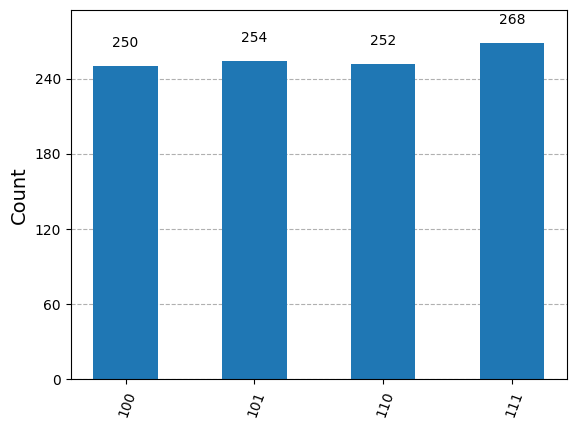

In [3]:
plot_histogram(counts)
